<a href="https://colab.research.google.com/github/Ayazhannn/Machine-Learning-Daily-Projects/blob/main/Day6%20SDSS%20DR18%20Classification%20AdaBoost%2C%20Gradient%20Boosting%2C%20XGBoost/Day6_Sloan_Digital_Sky_Survey_Boosting_Classification_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 6
About today's work, I will be exploring classification using boosting methods on a dataset containing observations of galaxies, stars, and quasars. This dataset is based on the Data Release 18 (DR18) from the Sloan Digital Sky Survey (SDSS), a groundbreaking astronomical survey that has provided detailed imaging and spectroscopic information for millions of celestial objects.

For more information about this awesome project - please visit their website:

http://www.sdss.org/


In this notebook, we'll delve into astronomy and machine learning, using the rich data provided by SDSS to classify celestial objects into distinct categories. By utilizing boosting algorithms, such as AdaBoost, Gradient Boosting, and XGBoost.

Aim of this notebool to develop robust models capable of accurately distinguishing between galaxies, stars, and quasars based on their unique spectral signatures.

Dataset: https://www.kaggle.com/datasets/diraf0/sloan-digital-sky-survey-dr18



##Machine Learning Fundamentals
Before explaining boodting, i'll explain necessary terms.

In Machine Learning we have 2 types of errors: reducable and irreducable.
**Irreducable errors** are those that can't be removed and they will always be present in ml models.
**Reducable errors** are those that can be reduce to improve model performance and they appear because model output doesn't match desired output.

We have 2 reducable errors:


1.   Bias - this is a difference between our predicted and actual values.Higher bias shows that our model didn't capture patterns and assumptions made by model are too basic, and it will not perform good on testing set.
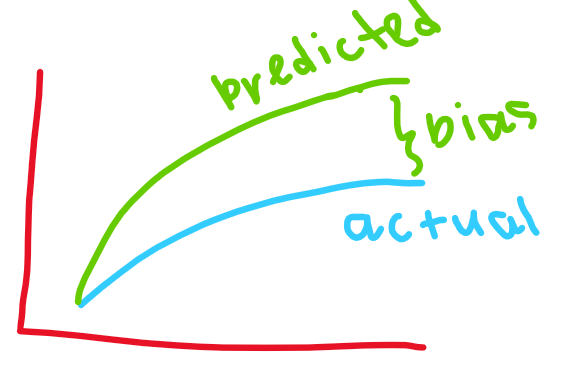

2.   Variance - when model is working with a data it sees data certain amount of numbers to get patterns.But if model would see that data too many times it will be trained to know patterns only of this data, and also it will learn unnecessary data presents like noise.In short - it will be *overfitting*.
We describe Variance as model's sensitivity to flactuation in data.
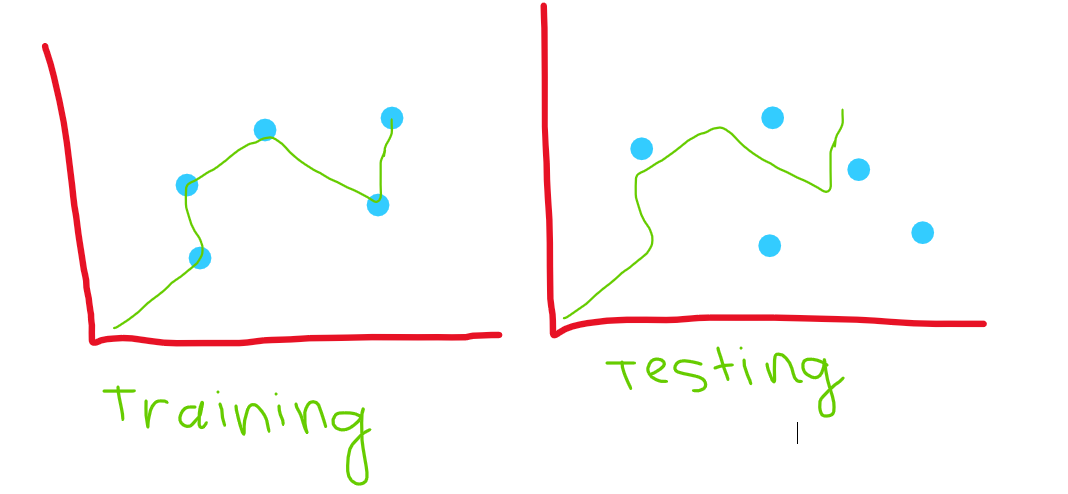
















# Boosting method

### Ensemble learning
Let's recamp on **Ensemble learning.** When we make decision making it is better to know opinions of many people instead of a one, same logic uses Ensemble learning. Basically, the underlying concept behind ensemble learning is to combine the outputs of diverse models to create a more precise prediction.By considering different perspectives and and utilizing strength of different models, it boosts the perforamnce of the learning system.
So, today i will use on of the methods of ensemble learning - Boosting Method.

### Main idea behind Boosting
In previous project i talked about Bagging and how it is used to reduce variance and how it trains different models parallely, but boosting uses different approach.

Boosting method used to reduce bias error and it trsins different models sequentially.

Boosting works with the foolowing steps:

1. We divide our data to multiple subsets
2. Give one subset to our first base/weak model and train it
3. Then we will test model with the same training set that used, as a result of testing some data points will be incorrectly predicted.
(Why test on training data? Usually we use test set for testing, but with boosting approach we need to improve models by focusing on misclassified data. Testing with train set helps to identify misclassified data points)
4. Each data point that were misclassified will be sent to next subset and this subset is updated
5. We give new subset to a second weak learner
6. The process repeates until total number of subsets is reached
7. Then we will have total prediction. Unlike in bagging there's no need for aggregation in the end, since in boosting overall prediction calculated after each weak learner step.

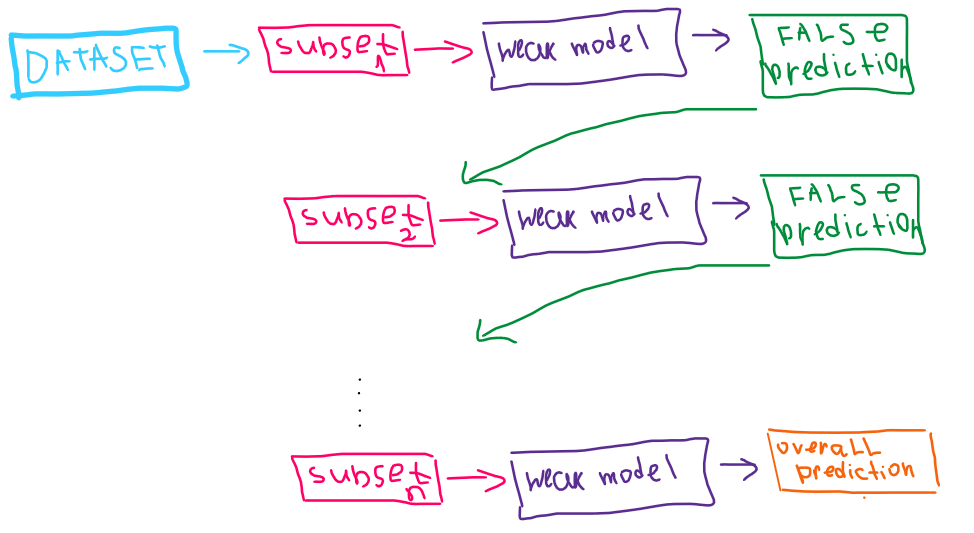

Today i am going to use:

* AdaBoost
* Gradient Boosting
* XGBoost

# Loading the data

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df = pd.read_csv('/content/drive/MyDrive/MLdata/SDSS_DR18.csv')
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


Here's the explanation for each column:
* **objid**: Object identifier, a unique identifier for each object in the dataset.
* **specobjid**: Spectroscopic object identifier, a unique identifier for objects that have been spectroscopically observed.
* **ra**: Right Ascension, the angular distance eastward along the celestial equator from the vernal equinox to the hour circle of the point in question.
* **dec**: Declination, the angular distance of a point north or south of the celestial equator.
* **u, g, r, i, z**: Magnitudes in the u, g, r, i, and z filters, respectively. These represent the brightness of the object in different bands of the electromagnetic spectrum.
* **run**: Run number, identifying the specific scan across the sky.
* **rerun**: Rerun number, identifying reprocessed versions of the data.
* **camcol**: Camera column, identifying the specific camera column used.
* **field**: Field number, identifying the specific field.
* **plate**: Plate number, identifying the spectroscopic plate.
* **mjd**: Modified Julian Date, the date of the observation.
* **fiberid**: Fiber identifier, identifying the specific spectroscopic fiber.
* **petroRad_u, petroRad_g, petroRad_i, petroRad_r, petroRad_z**: Petrosian radius in the u, g, i, r, and z bands, respectively.
* **petroFlux_u, petroFlux_g, petroFlux_i, petroFlux_r, petroFlux_z**: Petrosian flux in the u, g, i, r, and z bands, respectively.
* **petroR50_u, petroR50_g, petroR50_i, petroR50_r, petroR50_z:** Petrosian 50% light radius in the u, g, i, r, and z bands, respectively.
* **psfMag_u, psfMag_g, psfMag_i, psfMag_r, psfMag_z**: PSF (Point Spread Function) magnitudes in the u, g, i, r, and z bands, respectively.
* **expAB_u, expAB_g, expAB_i, expAB_r, expAB_z**: Exponential radius in the u, g, i, r, and z bands, respectively.
* **redshift**: Redshift, the change in wavelength of light due to the Doppler effect, providing information about the distance to the object.
* **class**: Class of object, indicating whether it is a galaxy, star, or quasar.

# Data Exploration

In [77]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.240000e+18,1.859200e+18,168.856657,17.832739,18.641137,17.407088,16.878550,16.517137,16.154837,1477.564770,...,17.884605,18.392280,17.531364,17.138493,0.588445,0.673314,0.660934,0.549130,0.311389,0.168441
std,0.000000e+00,2.265257e+18,83.844216,26.344079,0.829035,0.974683,1.118858,31.694636,54.871034,459.696408,...,1.288541,1.282606,31.701194,54.876352,0.260097,0.235317,0.242927,31.622620,54.770201,0.434285
min,1.240000e+18,2.990000e+17,0.003092,-11.252825,11.726470,11.696170,11.277090,-9999.000000,-9999.000000,94.000000,...,11.253550,11.658570,-9999.000000,-9999.000000,0.050000,0.050000,0.050000,-9999.000000,-9999.000000,-0.004268
25%,1.240000e+18,5.280000e+17,128.879582,-0.537780,18.214315,16.853340,16.194763,15.861995,15.620268,1239.000000,...,17.098733,17.600867,16.842290,16.645390,0.387406,0.514009,0.487474,0.470529,0.409965,0.000065
50%,1.240000e+18,6.980000e+17,168.079889,2.899490,18.878005,17.520310,16.896065,16.594740,16.419040,1458.000000,...,18.023495,18.585375,17.742665,17.526325,0.611638,0.704848,0.692239,0.679104,0.641443,0.048772
75%,1.240000e+18,2.750000e+18,214.554569,46.911371,19.275750,18.052460,17.565593,17.310102,17.193873,1854.000000,...,18.858960,19.327640,18.586033,18.366243,0.796679,0.864902,0.863116,0.849946,0.822491,0.096680
max,1.240000e+18,1.410000e+19,359.996095,68.731483,19.599990,19.977270,31.698160,30.980870,28.668700,2327.000000,...,24.802850,25.962180,24.362590,27.043280,1.000000,1.000000,1.000000,1.000000,1.000000,6.990327


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

In [79]:
df.isnull().sum()

objid          0
specobjid      0
ra             0
dec            0
u              0
g              0
r              0
i              0
z              0
run            0
rerun          0
camcol         0
field          0
plate          0
mjd            0
fiberid        0
petroRad_u     0
petroRad_g     0
petroRad_i     0
petroRad_r     0
petroRad_z     0
petroFlux_u    0
petroFlux_g    0
petroFlux_i    0
petroFlux_r    0
petroFlux_z    0
petroR50_u     0
petroR50_g     0
petroR50_i     0
petroR50_r     0
petroR50_z     0
psfMag_u       0
psfMag_r       0
psfMag_g       0
psfMag_i       0
psfMag_z       0
expAB_u        0
expAB_g        0
expAB_r        0
expAB_i        0
expAB_z        0
redshift       0
class          0
dtype: int64

In [80]:
df['class'].value_counts()

GALAXY    52343
STAR      37232
QSO       10425
Name: class, dtype: int64

From this we can see that out dependent variable is not divided balanced and also there's no missing values and categorical values. No need for imputation.

In [81]:
df.columns.values

array(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid',
       'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i',
       'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r',
       'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g',
       'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'], dtype=object)

There's some unneeded data, like identifiers and run-rerun numbers.Since these columns do no give any meaningful data we will drop them.

In [82]:
df.drop(['objid', 'specobjid', 'run','rerun', 'camcol', 'field'], inplace=True, axis=1)
df.head()

,ra,dec,u,g,r,i,z,plate,mjd,fiberid,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,288,52000,456,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,289,51990,322,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,288,52000,614,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,2558,54140,414,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,2558,54140,403,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


<ipython-input-83-45aabfe50eb9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['class'], palette='Set1')


Text(0.5, 1.0, 'Class Categories')

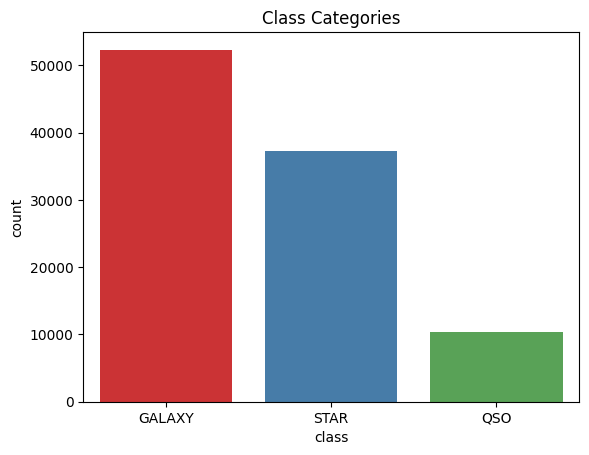

In [83]:
sns.countplot(x=df['class'], palette='Set1')
plt.title('Class Categories')

Redshift
To start the univariate analysis we will plot histograms for the 'redshift' feature column for each class. When an object is moving away from us, the light from the object is known as **redshift**, and when an object is moving towards us, the light from the object is known as **blueshift**.

This will tell us how the redshift values are distributed over their range.

Text(0.5, 1.0, 'QSO')

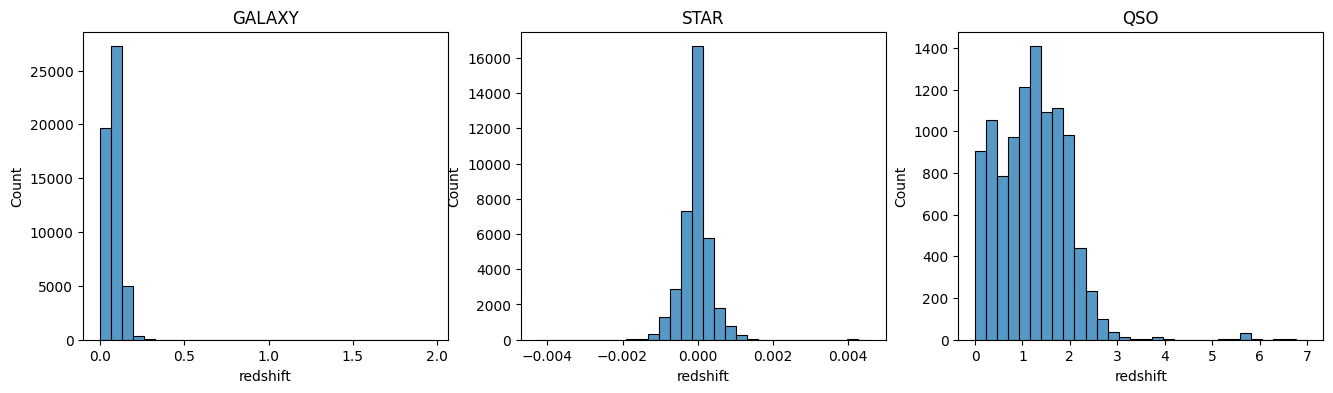

In [84]:
fig, axes = plt.subplots(1,3, figsize=(16,4))
ax = sns.histplot(df[df['class']=='GALAXY'].redshift, bins=30, ax=axes[0], kde=False)
ax.set_title('GALAXY')
ax = sns.histplot(df[df['class']=='STAR'].redshift, bins=30, ax=axes[1], kde=False)
ax.set_title('STAR')
ax = sns.histplot(df[df['class']=='QSO'].redshift, bins=30, ax=axes[2], kde=False)
ax.set_title('QSO')

Results of histogram:

1. Shape of Galaxy histogram demonstrates that galaxies at lower redshifts(closer to us) are more than galaxies that are at higher redshifts(farther away).
2. Star histogram seems to have zero centered normal distribution. In case of Star Histogram it is observed that there are negative redshift values, which are not redshifts actually. Negative redshifts == Blueshift. It means that there is almost equall number of far away stars and close to us stars.
3. The redshift values for Quasars are a lot more uniformly distributed than for Stars or Galaxies. They are roughly evenly distributed from 0 to 2, than the occurences decrease drastically. For 4 oder ~5.5 there are some outliers.

<ipython-input-85-0a601e935364>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

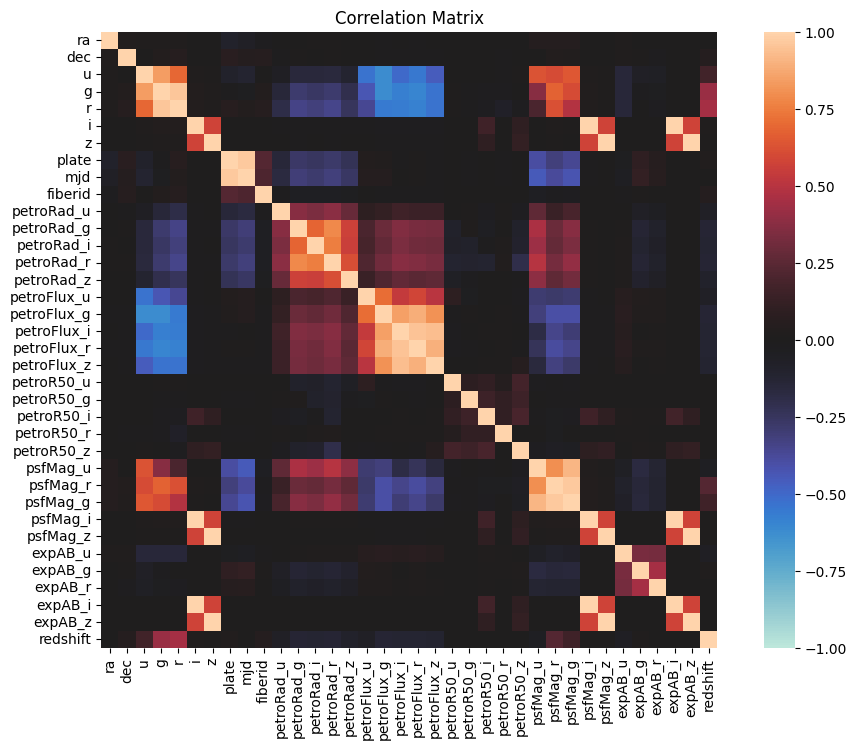

In [85]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, center=0, square=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')

# Data Prepocessing

Let's use LabelEncoder to encode target labels with value between 0 and n_classes-1
here the target (class) has three unique values a GALAXY, a STAR and a QSO

In [86]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])


In [87]:
df['class'].value_counts()

0    52343
2    37232
1    10425
Name: class, dtype: int64

* Galaxy - 0
* Star - 2
* QOS - 1

In [88]:
X = df.iloc[:,:-1]
X

,ra,dec,u,g,r,i,z,plate,mjd,fiberid,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,288,52000,456,...,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,289,51990,322,...,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,288,52000,614,...,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,2558,54140,414,...,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,2558,54140,403,...,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,154.077143,55.614066,19.39861,18.35476,18.00348,17.89408,17.81222,3177,54833,320,...,18.01472,18.35865,17.90406,17.82489,0.999653,0.999791,0.794516,0.802310,0.537987,-0.000101
99996,154.067926,55.635794,19.07703,18.05159,17.78332,17.68976,17.66209,3177,54833,317,...,17.79733,18.06198,17.69745,17.67005,0.802407,0.999912,0.999776,0.999682,0.544329,-0.000352
99997,153.897018,55.712582,19.07982,17.51349,16.64037,16.24183,15.91180,946,52407,153,...,18.14792,19.05242,17.79391,17.40130,0.859021,0.760212,0.769053,0.772322,0.845797,0.117501
99998,235.656141,56.297044,17.27528,16.41704,16.11662,15.98858,15.97745,617,52072,197,...,16.10380,16.42854,15.98151,15.97900,0.655041,0.199795,0.481020,0.650008,0.822835,-0.000400


In [89]:
y = df.iloc[:, -1:]
y

,class
0,0
1,2
2,0
3,2
4,2
...,...
99995,2
99996,2
99997,0
99998,2


Now we will use feature scaling to normalize features. MinMaxScaler is a technic that scales and translates each feature individually such that it is in the specified range, usually between 0 and 1.

In [90]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
X = scaler.fit_transform(X)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=44)

# AdaBoost

Adaptive Boosting is one of the first succesful boosting methods and it is known for its simplicity.

Steps of how AdaBoost works:

1. Inintial: it gives equal weights to each data point at start
2. Training: AdaBoost iteratively trains a sequence of weak learners (typically decision trees) on the training data. In each iteration, it focuses more on the instances that were misclassified in the previous iteration. Each weak learner is trained on a modified version of the training dataset, where the weights of the misclassified instances are increased.
3. Weighting: It assigns a weight to each weak learner based on its accuracy, with more accurate models receiving higher weights.
4. Combining Predictions: To make predictions, AdaBoost combines the predictions from all weak learners. It gives more weight to the predictions of the more accurate weak learners, effectively prioritizing the predictions of models that performed better on the training data.

5. Final Prediction: Finally, AdaBoost combines the weighted predictions to make the final classification decision. The combined prediction is typically determined by a weighted majority vote, where the weights are based on the accuracy of each weak learner.

In [102]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=40, algorithm='SAMME', learning_rate=1.0 )
ab.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME', n_estimators=40)

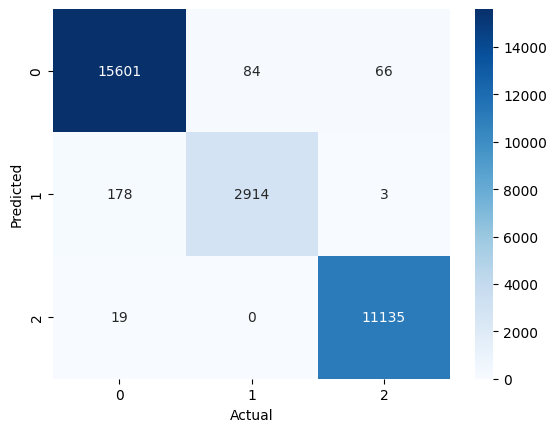

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

ab_pred = ab.predict(X_test)

ab_cfm = confusion_matrix(y_test, ab_pred)
sns.heatmap(ab_cfm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [104]:
print(classification_report(y_test, ab_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15751
           1       0.97      0.94      0.96      3095
           2       0.99      1.00      1.00     11154

    accuracy                           0.99     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000



Accuracy score: is 98.33 % for the AdaBoost model. It means for each of 100 total number of prediction, in average, our model can predict 98 cases correctly

The confusion matrix:

1.   Model predicted 15601 of Galaxies correctly, but misclassified 178 instances as Quasars and 19 as Stars
2.   Model predicted 2914 of Quasars correctly, but misclassified 84 instances as Galaxies
3.   Model predicted 11135 of Stars correctly, but misclassified 3 instances as Quasars and 66 as Qalaxies


Classification Report:

Precision:

1. Galaxies(0): the ratio correctly predicted galaxies observations to the total predicted galaxies observations is 99%

2. Stars(2): the ratio correctly predicted stars observations to the total predicted stars observations is 99%

3. QSO(1): the ratio correctly predicted quasars observations to the total predicted quasars observations is 97%

Recall:

1. Galaxies(0): the ratio of correctly predicted galaxies observations to the all observations in actual class is 99%

2. Stars(2): the ratio of correctly predicted stars observations to the all observations in actual class is 100%

3. QSO(1): the ratio of correctly predicted quasars observations to the all observations in actual class is 94%

F1 Score is the weighted average of Precision and Recall. For class 0(Galaxy) it is 99%, for class 1(QSO) it is 96%, for class 2(Stars) it is 100%.

In [105]:
ab_acc = ab.score(X_test, y_test)
ab_acc

0.9883333333333333

# Gradient Boosting Classifier

Gradient Boosting Machine (GBM) is a powerful machine learning model used for both classification and regression tasks. It creates an ensemble of weak learners, typically decision trees, through an iterative process.

Here is the steps on how GBM works:

1.  Initial: GBM starts with an initial prediction, it makes starting point for the iteration. For Regression tasks usually we take average of the target variable and for Classification tasks we take most frequent class(In our case it will be Galaxies)
    
2.  Training: Each subsequent weak learner is trained to predict the residuals, which are the differences between the actual and predicted values, of the ensemble model built in the previous iteration.
    
3.  Optimization: Name of Gradient Boosting came from its optimizition technix that it uses - Gradient Descent. It minimizes a loss function, such as mean squared error for regression or cross-entropy loss for classification(i will talk about all this loss and optimization functions in next project, mostly mathematic side of this methods), by iteratively updating the predictions in the direction that reduces the loss.
    
4.  Ensemble Construction: After training, each weak learner is added to the ensemble, and weights are assigned to them based on their contribution to the overall prediction. Weak learners with higher contribution weights are more valued in the ensemble.
    
5.  Regularization: Techniques like tree pruning, limiting the depth of trees, or introducing a shrinkage parameter (learning rate) are used to prevent overfitting and improve generalization performance.
    
6.  Stopping Criterion: The training process continues until a predefined stopping criterion is met. This could be reaching a maximum number of iterations, achieving a certain level of performance on a validation set, or when the improvement in the loss becomes negligible.
    

By iteratively refining predictions through the addition of weak learners, GBM achieves high predictive accuracy and is widely used in both competitions and real-world applications.

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, loss='log_loss', learning_rate=1.0 )
gb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0)

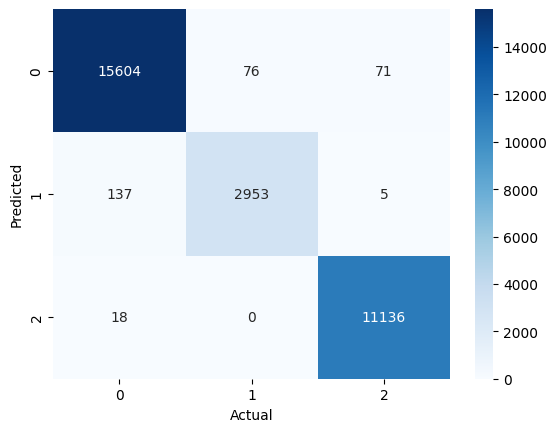

In [107]:
gb_pred = gb.predict(X_test)

gb_cfm = confusion_matrix(y_test, gb_pred)
sns.heatmap(gb_cfm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [108]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15751
           1       0.97      0.95      0.96      3095
           2       0.99      1.00      1.00     11154

    accuracy                           0.99     30000
   macro avg       0.99      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000



Accuracy score: is 98.97 % for the Gradient Boosting model. It means for each of 100 total number of prediction, in average, our model can predict 99 cases correctly

The confusion matrix:

1.   Model predicted 15604 of Galaxies correctly, but misclassified 137 instances as Quasars and 18 as Stars
2.   Model predicted 2953 of Quasars correctly, but misclassified 76 instances as Galaxies
3.   Model predicted 11136 of Stars correctly, but misclassified 5 instances as Quasars and 71 as Qalaxies


Classification Report:

Precision:

1. Galaxies(0): the ratio correctly predicted galaxies observations to the total predicted galaxies observations is 99%

2. Stars(2): the ratio correctly predicted stars observations to the total predicted stars observations is 99%

3. QSO(1): the ratio correctly predicted quasars observations to the total predicted quasars observations is 97%

Recall:

1. Galaxies(0): the ratio of correctly predicted galaxies observations to the all observations in actual class is 99%

2. Stars(2): the ratio of correctly predicted stars observations to the all observations in actual class is 95%

3. QSO(1): the ratio of correctly predicted quasars observations to the all observations in actual class is 100%

F1 Score is the weighted average of Precision and Recall. For class 0(Galaxy) it is 99%, for class 1(QSO) it is 96%, for class 2(Stars) it is 100%.

In [109]:
gb_acc = gb.score(X_test, y_test)
gb_acc

0.9897666666666667

# XGBoost

XGBoost, short for Extreme Gradient Boosting, that is widely used for both classification and regression tasks. It's an implementation of gradient boosting machines and is known for its speed, performance, and flexibility. Here's how XGBoost works:

1. Initial: XGBoost begins with a simple guess.For regression tasks (where we predict a numerical value), XGBoost might begin by guessing the average value of the target variable. For binary classification tasks (where we predict one of two categories), it might start by guessing the average probability of the positive class, usually represented as the log odds.

2. Gradient Calculation: XGBoost calculates the gradient of the loss function with respect to the predictions of the current model. For regression tasks, the loss function may be mean squared error, while for classification tasks, it may be cross-entropy loss.

3. Hessian Calculation: XGBoost calculates the second-order derivative (Hessian) of the loss function with respect to the predictions of the current model. This information is used to perform second-order optimization.

4. Tree Construction: XGBoost constructs a decision tree to approximate the negative gradient of the loss function. It uses a greedy algorithm to recursively split the data into leaves that minimize the loss function.

5. Regularization: XGBoost applies regularization techniques to control the complexity of the trees and prevent overfitting. This includes L1 and L2 regularization terms added to the objective function and a shrinkage parameter (learning rate) that scales the contribution of each tree.

6. Tree Pruning: After constructing the tree, XGBoost prunes the tree by removing splits that do not significantly improve the model's performance. This helps prevent overfitting and improves generalization performance.

7. Model Update: XGBoost updates the model by adding the predictions of the newly constructed tree to the previous model. It uses a weighted sum of the predictions from all trees in the ensemble to make the final prediction.

8. Stopping Criterion: XGBoost continues adding trees to the ensemble until a predefined stopping criterion is met. This could be reaching a maximum number of trees, achieving a certain level of performance on a validation set, or when the improvement in the loss becomes negligible.

9. Prediction: Finally, to make predictions on new data, XGBoost combines the predictions from all trees in the ensemble. It uses a weighted sum of the predictions, where the weights are based on the accuracy of each tree.

In [110]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

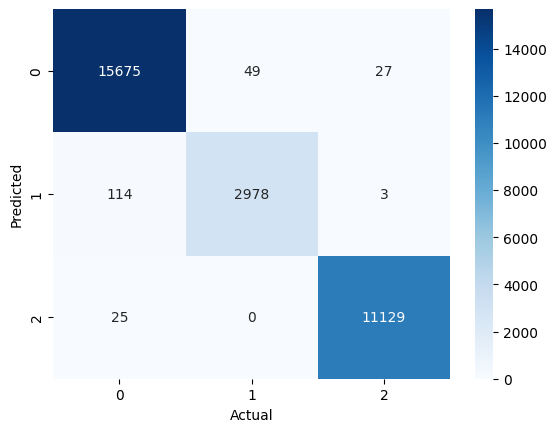

In [111]:
xgb_pred = xgb.predict(X_test)

xgb_cfm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cfm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [112]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15751
           1       0.98      0.96      0.97      3095
           2       1.00      1.00      1.00     11154

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [113]:
xgb_acc = xgb.score(X_test, y_test)
xgb_acc

0.9927333333333334

Accuracy score: is 99.27 % for the XGBoost model. It means for each of 100 total number of prediction, in average, our model can predict 99 cases correctly

The confusion matrix:

1.   Model predicted 15675 of Galaxies correctly, but misclassified 114 instances as Quasars and 25 as Stars
2.   Model predicted 2978 of Quasars correctly, but misclassified 49 instances as Galaxies
3.   Model predicted 11129 of Stars correctly, but misclassified 3 instances as Quasars and 27 as Qalaxies


Classification Report:

Precision:

1. Galaxies(0): the ratio correctly predicted galaxies observations to the total predicted galaxies observations is 99%

2. Stars(2): the ratio correctly predicted stars observations to the total predicted stars observations is 100%

3. QSO(1): the ratio correctly predicted quasars observations to the total predicted quasars observations is 98%

Recall:

1. Galaxies(0): the ratio of correctly predicted galaxies observations to the all observations in actual class is 100%

2. Stars(2): the ratio of correctly predicted stars observations to the all observations in actual class is 100%

3. QSO(1): the ratio of correctly predicted quasars observations to the all observations in actual class is 96%

F1 Score is the weighted average of Precision and Recall. For class 0(Galaxy) it is 99%, for class 1(QSO) it is 97%, for class 2(Stars) it is 100%.

# Report


In [114]:
accuracies = {
    "AdaBoost Classifier" : ab_acc,
    "Gradient Boosting Classifier" : gb_acc,
    "XGBoost Classifier" : xgb_acc
}

for model, accuracy in accuracies.items():
  print(f"{model} accuracy is {accuracy}")

AdaBoost Classifier accuracy is 0.9883333333333333
Gradient Boosting Classifier accuracy is 0.9897666666666667
XGBoost Classifier accuracy is 0.9927333333333334


| Metrics  | AdaBoost           |Gradient Boosting| XGBoost         |
|----------|------------------- |-----------------|-----------------|
|Accuracy  | 98.33%             | 98.97%          | 99.27%          |
|Precision |0:99%, 1:97%, 2:99% |0:99%, 1:97%, 2:99%|0: 99%, 1: 98%, 2: 100%|
|Recall    |0:99%, 1:94%, 2:100%|0:99%, 1:95%, 2:100%|0: 100%, 1: 96%,  2:100%|
|F1-score  |0:99%, 1:96%, 2:99% |0:99%, 1:96%, 2:100%|0: 99%, 1: 97%, 2:100%|

Analysis:

* Accuracy: All three classifiers achieved relatively high accuracy scores, ranging from 98% to 99%. This indicates that they are effective in correctly predicting .

* Precision: The precision scores for all classes (galaxies, stars and qso) are consistently high across all classifiers, with constant 99% for Galaxies, ranging from 98 to 99 for QSO, and 99 to 100% for Stars. This suggests that the classifiers perform well in correctly identifying different type of cosmic objects without misclassifying too many instances.

* Recall: The recall scores vary slightly among the classifiers, particularly for class 1 (Quasars). However, all classifiers maintain relatively high recall scores for all three classes, indicating their ability to capture the majority of positive and negative instances in the dataset.

* F1-score: The F1-scores, which represent the harmonic mean of precision and recall, are also high for all classifiers. This indicates a good balance between precision and recall, further validating the classifiers' effectiveness.

Overall, the results demonstrate that all three Naive-Bayes classifiers - AdaBoost, Gradient Descent and XGBoost - perform well in Sky Digital Sky Survey dataset. Their high accuracy, precision, recall, and F1-scores indicate their capability to effectively classify cosmic objects based given observations with telescope.